<a href="https://colab.research.google.com/github/ujwalabhishek/AI/blob/master/Linear_Regression_using_Ststsmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Step 1. Reading and understanding the data

In [7]:
#1. Reading and understanding the data
    # 1.1 Importing data using the pandas library
advertising = pd.read_csv('sample_data/advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
# 1.2 Understanding the data structure
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
advertising.shape

(200, 4)

#Step 2. Visualising the data

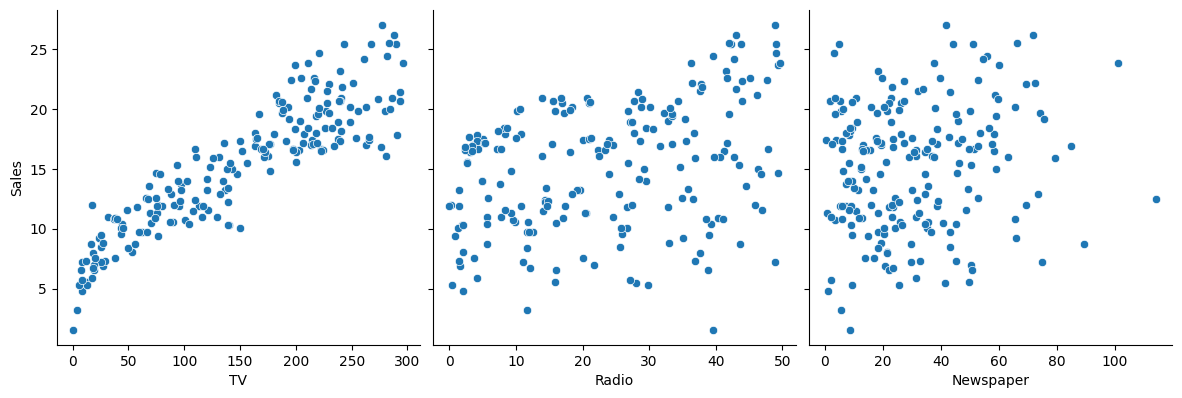

In [21]:
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

<Axes: >

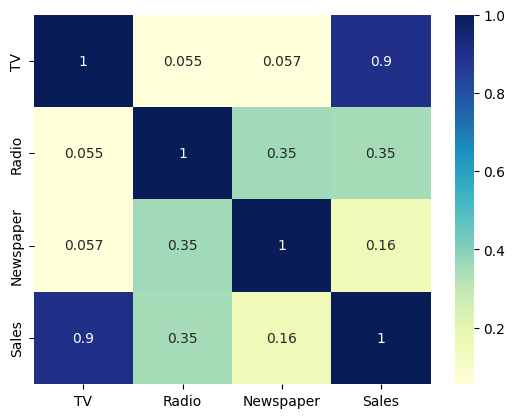

In [22]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot=True)

# Step 3: Performing Simple Linear Regression

##3.1: Using Statsmodel

**Steps:**

1. Create x and y
2. Create training data and test data
3. Train your model on the training set (ie learn the coffecients)
4. Evaluate the model(Training Set, Test Set)

In [23]:
#create x and y
x = advertising['TV']
y = advertising['Sales']

In [26]:
# Create training data and test data
import sklearn
from sklearn.model_selection import train_test_split

#help(train_test_split)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, train_size=0.70, random_state=100)

X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [28]:
y_train.head()


,Sales
74,17.0
3,16.5
185,22.6
26,15.0
90,14.0


### Building the Linear Regression Model

In [41]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

,0
const,6.948683
TV,0.054546


In [44]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 19 Jul 2025   Prob (F-statistic):           1.52e-52
Time:                        07:44:10   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

### Plot the regression line

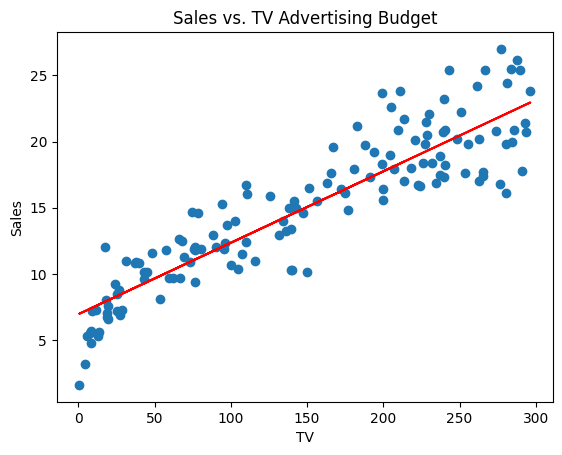

In [48]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r') # calculates the predicted y value against the training x values
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs. TV Advertising Budget')
plt.show()

# Step4: Residual Analysis and Predictions

Test assumptions :

* error terms should be normally distributed with mean equal to 0

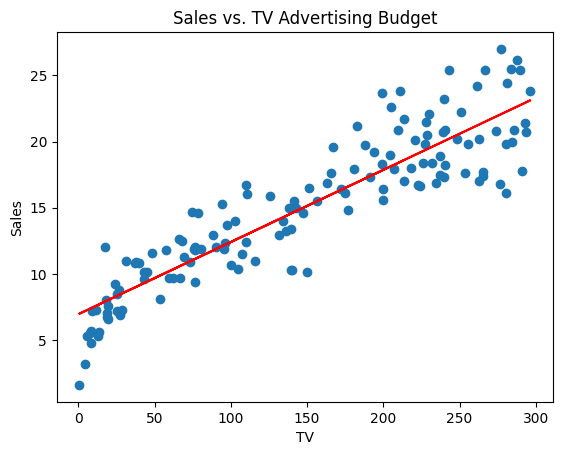

In [49]:
# error = f(y_train - y_train_pred )
y_train_pred = lr.predict(X_train_sm)
res = y_train - y_train_pred

#confirm y_train_pred same as 6.948 + 0.054*X_train
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs. TV Advertising Budget')
plt.show()

/tmp/ipython-input-50-4231029205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins=15)


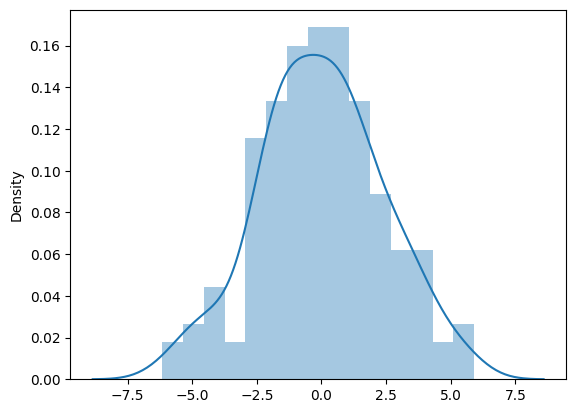

In [50]:
sns.distplot(res, bins=15)
plt.title('Error Terms Distribution')
plt.show()

* error terms should not demonstrate any patterns

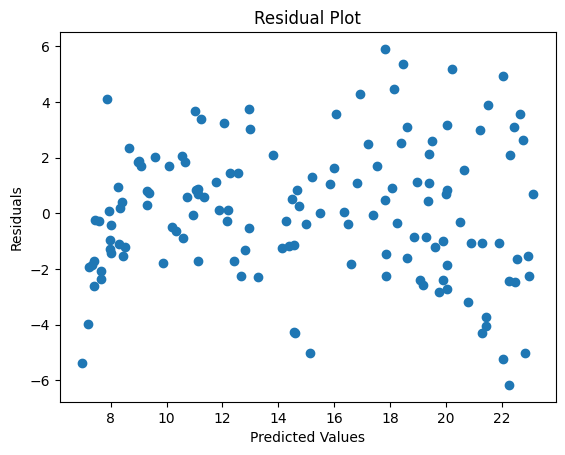

In [51]:
plt.scatter(y_train_pred, res)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Step 5: Predictions on the Test Set

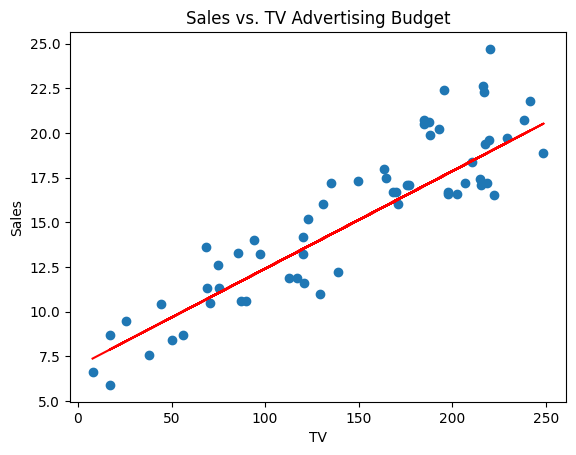

In [52]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales vs. TV Advertising Budget')
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print('MSE: ', mse)
print('RMSE: ', rmse)
print('R2: ', r2)

MSE:  4.077556371826953
RMSE:  2.019296008966232
R2:  0.792103160124566
